In [56]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
# load ts_sample_counts.pkl
with open('ts_sample_counts.pkl', 'rb') as f:
    ts_sample_counts = pickle.load(f)
with open('ts_sample_intervals.pkl', 'rb') as f:
    ts_sample_intervals = pickle.load(f)

8064
92975
(array([ 1833.,  3862.,  2621.,  3698.,  2436.,  2990.,  2540.,  2670.,
        2686., 67639.]), array([ 113. ,  908.1, 1703.2, 2498.3, 3293.4, 4088.5, 4883.6, 5678.7,
       6473.8, 7268.9, 8064. ]), <BarContainer object of 10 artists>)


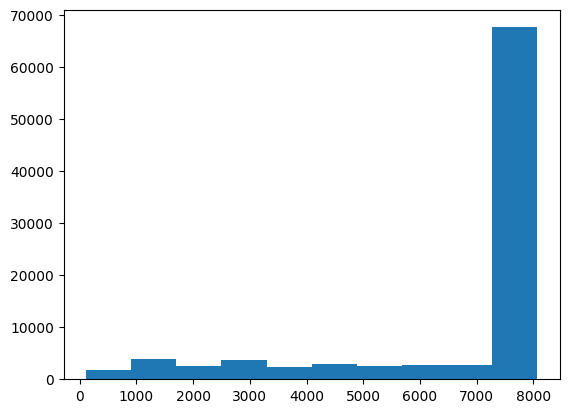

In [44]:
print(ts_sample_counts['azure_vm_traces_2017']['143742'].size)
print(len(ts_sample_counts['azure_vm_traces_2017']))
azure_lens = list(l.size for l in ts_sample_counts['azure_vm_traces_2017'].values())

import matplotlib.pyplot as plt
%matplotlib inline
print(plt.hist(azure_lens))
# sum(l.size for l in ts_sample_counts['azure_vm_traces_2017'].values())

In [59]:
def get_mean_interval(ts_sample_intervals):
    # input: list of intervals, for example: [(2048, 6944), (3296, 6176), (2176, 5888)]
    return sum([l[1] - l[0] for l in ts_sample_intervals]) / len(ts_sample_intervals)

for dataset in ts_sample_counts:
    print("==============================")
    print(dataset)
    print(len(ts_sample_counts[dataset]), len(ts_sample_intervals[dataset]))
    print(f"Number of variables in dataset: {len(ts_sample_counts[dataset])}")
    print(f"Total number of time points: {sum(l.size for l in ts_sample_counts[dataset].values())}")
    print(f"Average length of variables: {sum(l.size for l in ts_sample_counts[dataset].values()) / len(ts_sample_counts[dataset])}")
    # get maximum values of all variables
    print(f"Max sampling number: {max(l.max() for l in ts_sample_counts[dataset].values())}")
    print(f"Total sampling number: {sum(l.sum() for l in ts_sample_counts[dataset].values())}")
    print(f"Average sampling number: {sum(l.sum() for l in ts_sample_counts[dataset].values()) / sum(l.size for l in ts_sample_counts[dataset].values())}")

    print(f"Average interval: {sum(get_mean_interval(l) for l in ts_sample_intervals[dataset].values()) / len(ts_sample_intervals[dataset])}")
    print()

azure_vm_traces_2017
92975 92975
Number of variables in dataset: 92975
Total number of time points: 637621596
Average length of variables: 6857.989739177198
Max sampling number: 10
Total sampling number: 584261024
Average sampling number: 0.9163131043008148
Average interval: 3343.1779206733486

borg_cluster_data_2011
80345 80345
Number of variables in dataset: 80345
Total number of time points: 844151214
Average length of variables: 10506.580546393678
Max sampling number: 8
Total sampling number: 636374976
Average sampling number: 0.7538637218615668
Average interval: 2250.443605314274

bdg-2_rat
280 280
Number of variables in dataset: 280
Total number of time points: 4728288
Average length of variables: 16886.742857142857
Max sampling number: 104
Total sampling number: 237304128
Average sampling number: 50.18817127890687
Average interval: 8171.824640772066

lcl
712 712
Number of variables in dataset: 712
Total number of time points: 9543360
Average length of variables: 13403.5955056179

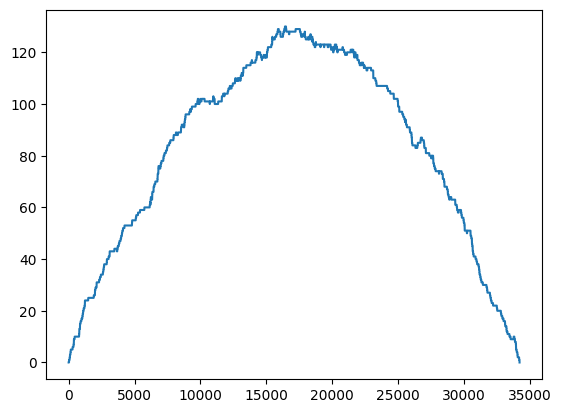

In [34]:
plt.plot(ts_sample_counts['sceaux']['Sceaux'])

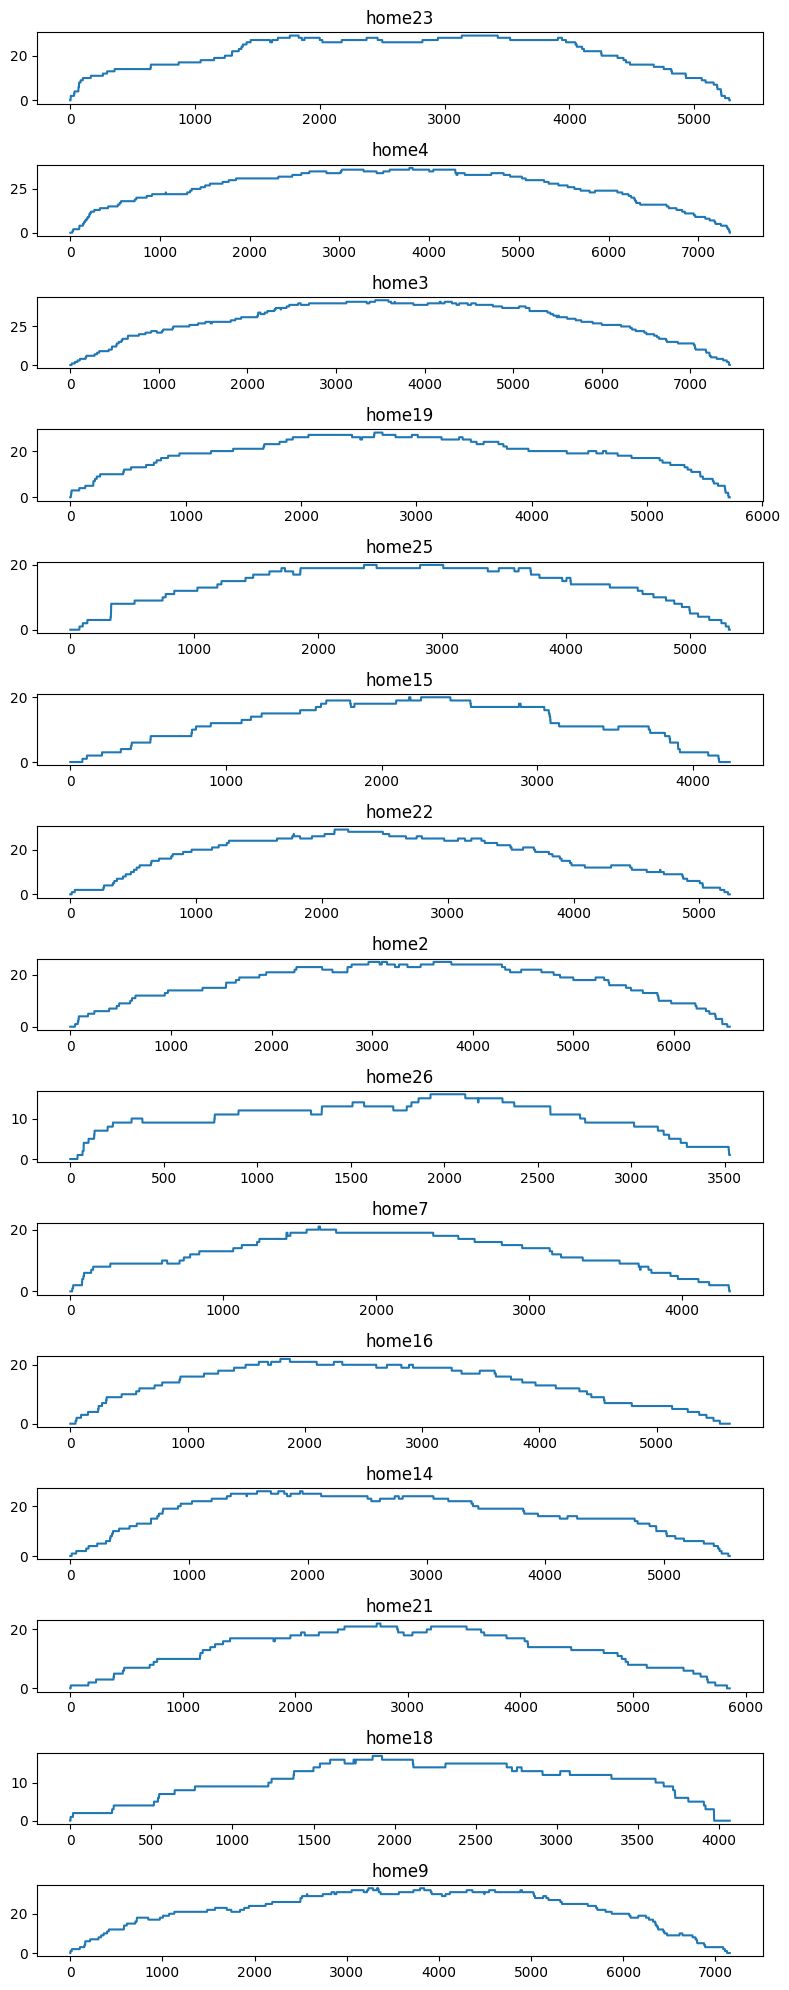

In [49]:
fig, axes = plt.subplots(nrows=len(ts_sample_counts['borealis']), ncols=1, figsize=(8, 20))

for ax, var in zip(axes, ts_sample_counts['borealis']):
    ax.plot(ts_sample_counts['borealis'][var])
    ax.set_title(var)

plt.tight_layout()
plt.show()

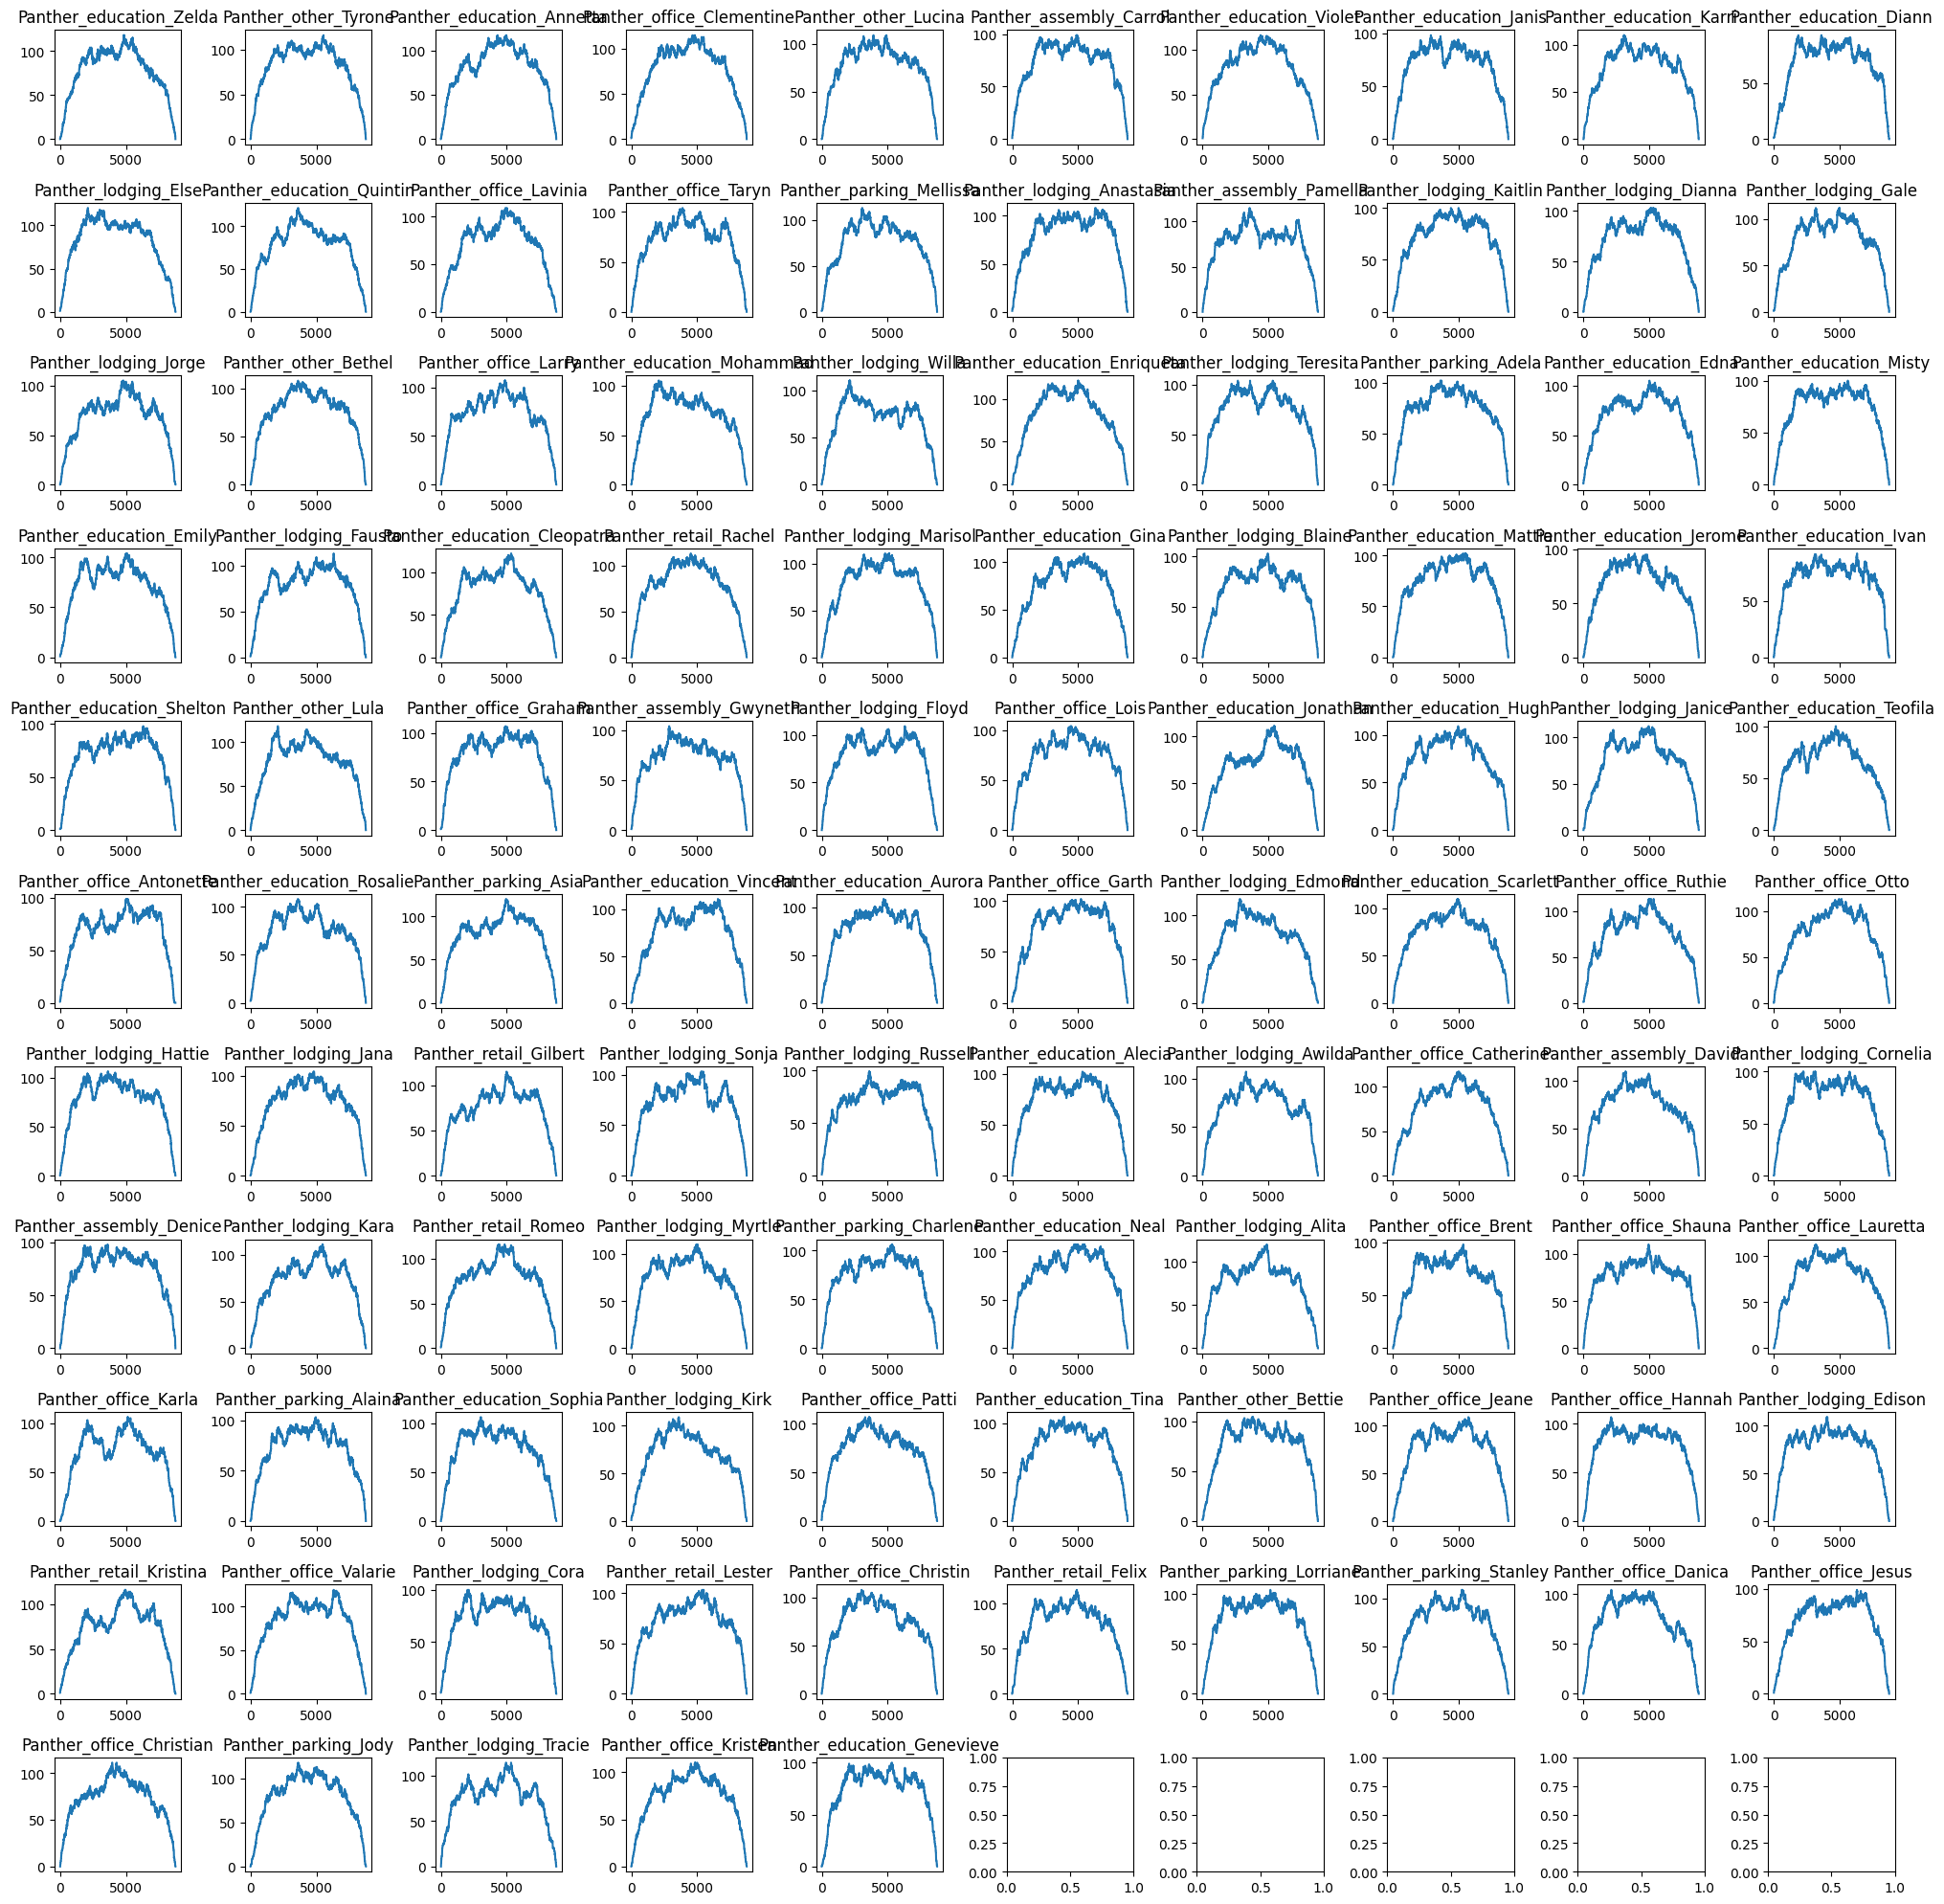

In [50]:
dataset = 'bdg-2_panther'
total_samples = len(ts_sample_counts[dataset])
fig, axes = plt.subplots(nrows=11, ncols=10, figsize=(20, 20))

for ax, var in zip(axes.flatten(), ts_sample_counts[dataset]):
    ax.plot(ts_sample_counts[dataset][var])
    ax.set_title(var)
    # ax.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

92975


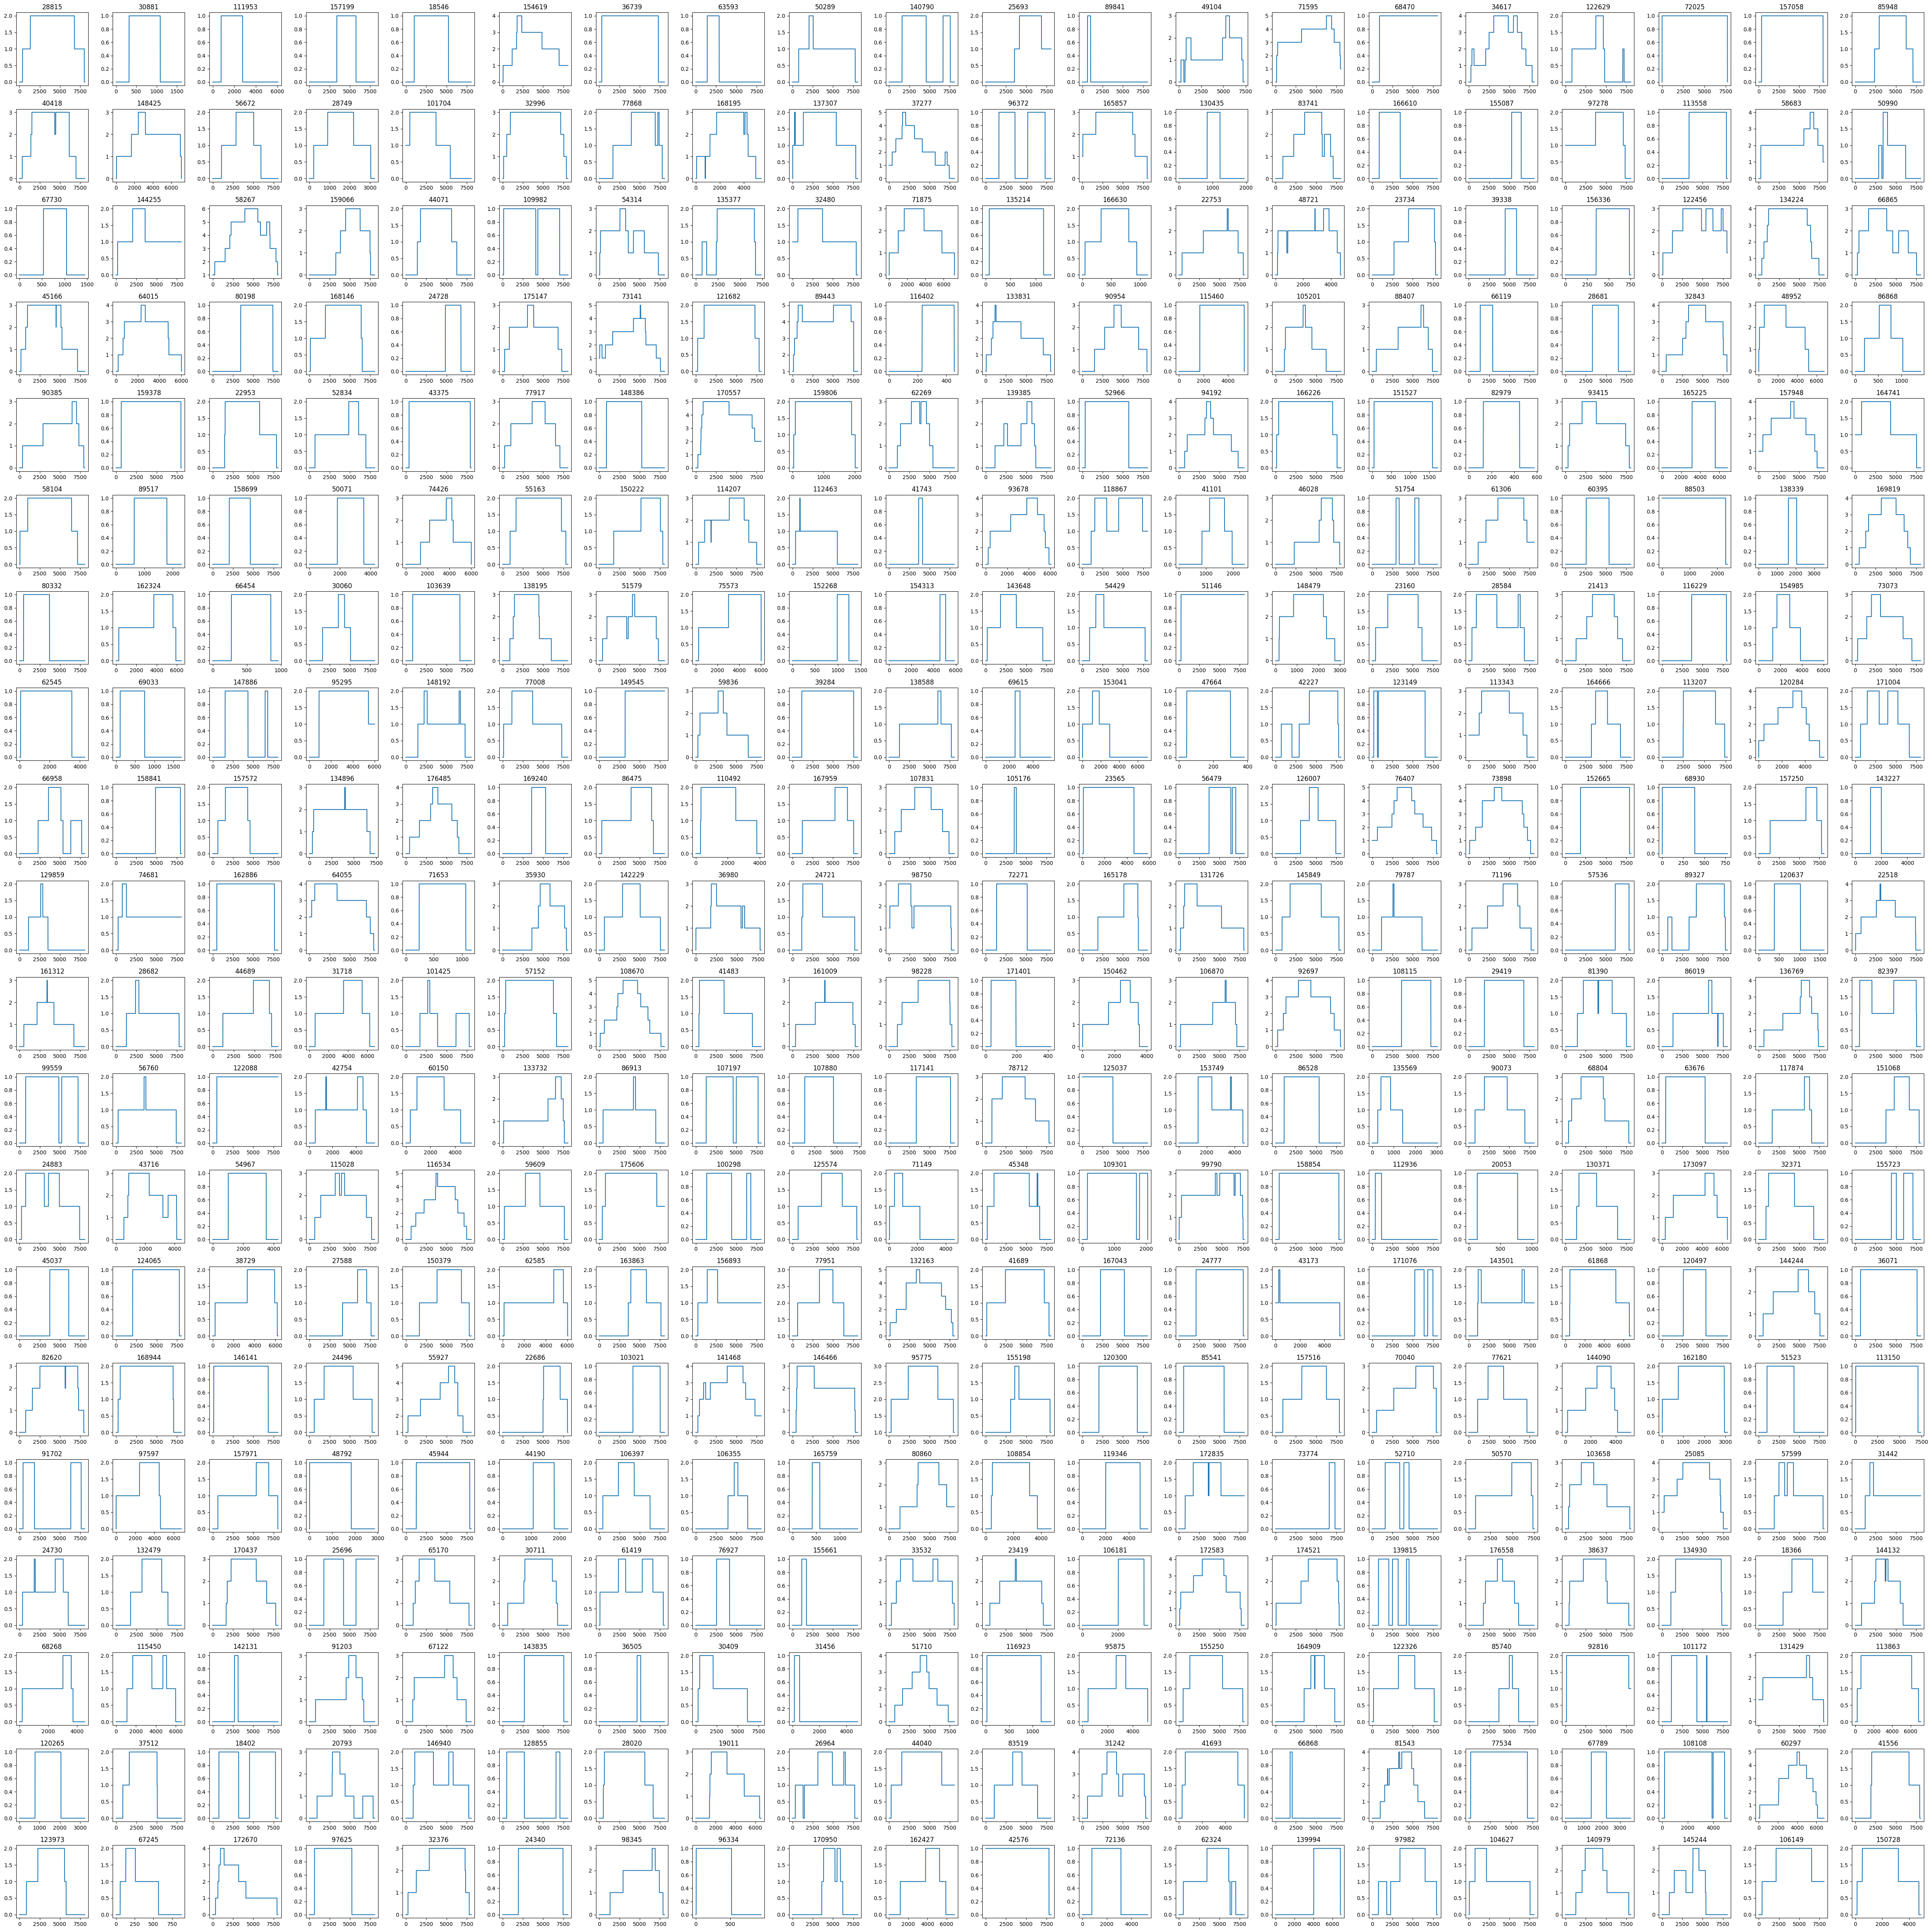

In [54]:
dataset = 'azure_vm_traces_2017'
total_samples = len(ts_sample_counts[dataset])
print(total_samples)
fig, axes = plt.subplots(nrows=20, ncols=20, figsize=(50, 50))

for ax, var in zip(axes.flatten(), ts_sample_counts[dataset]):
    ax.plot(ts_sample_counts[dataset][var])
    ax.set_title(var)
    # ax.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

In [36]:
from datasets import load_from_disk
LOTSA_V1_PATH="/data/Blob_EastUS/v-zhenwzhang/tsfm_datasets/lotsa_data"
dataset = load_from_disk(f"{LOTSA_V1_PATH}/bdg-2_panther")

/home/v-zhenwzhang/miniconda3/envs/moirai_probts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


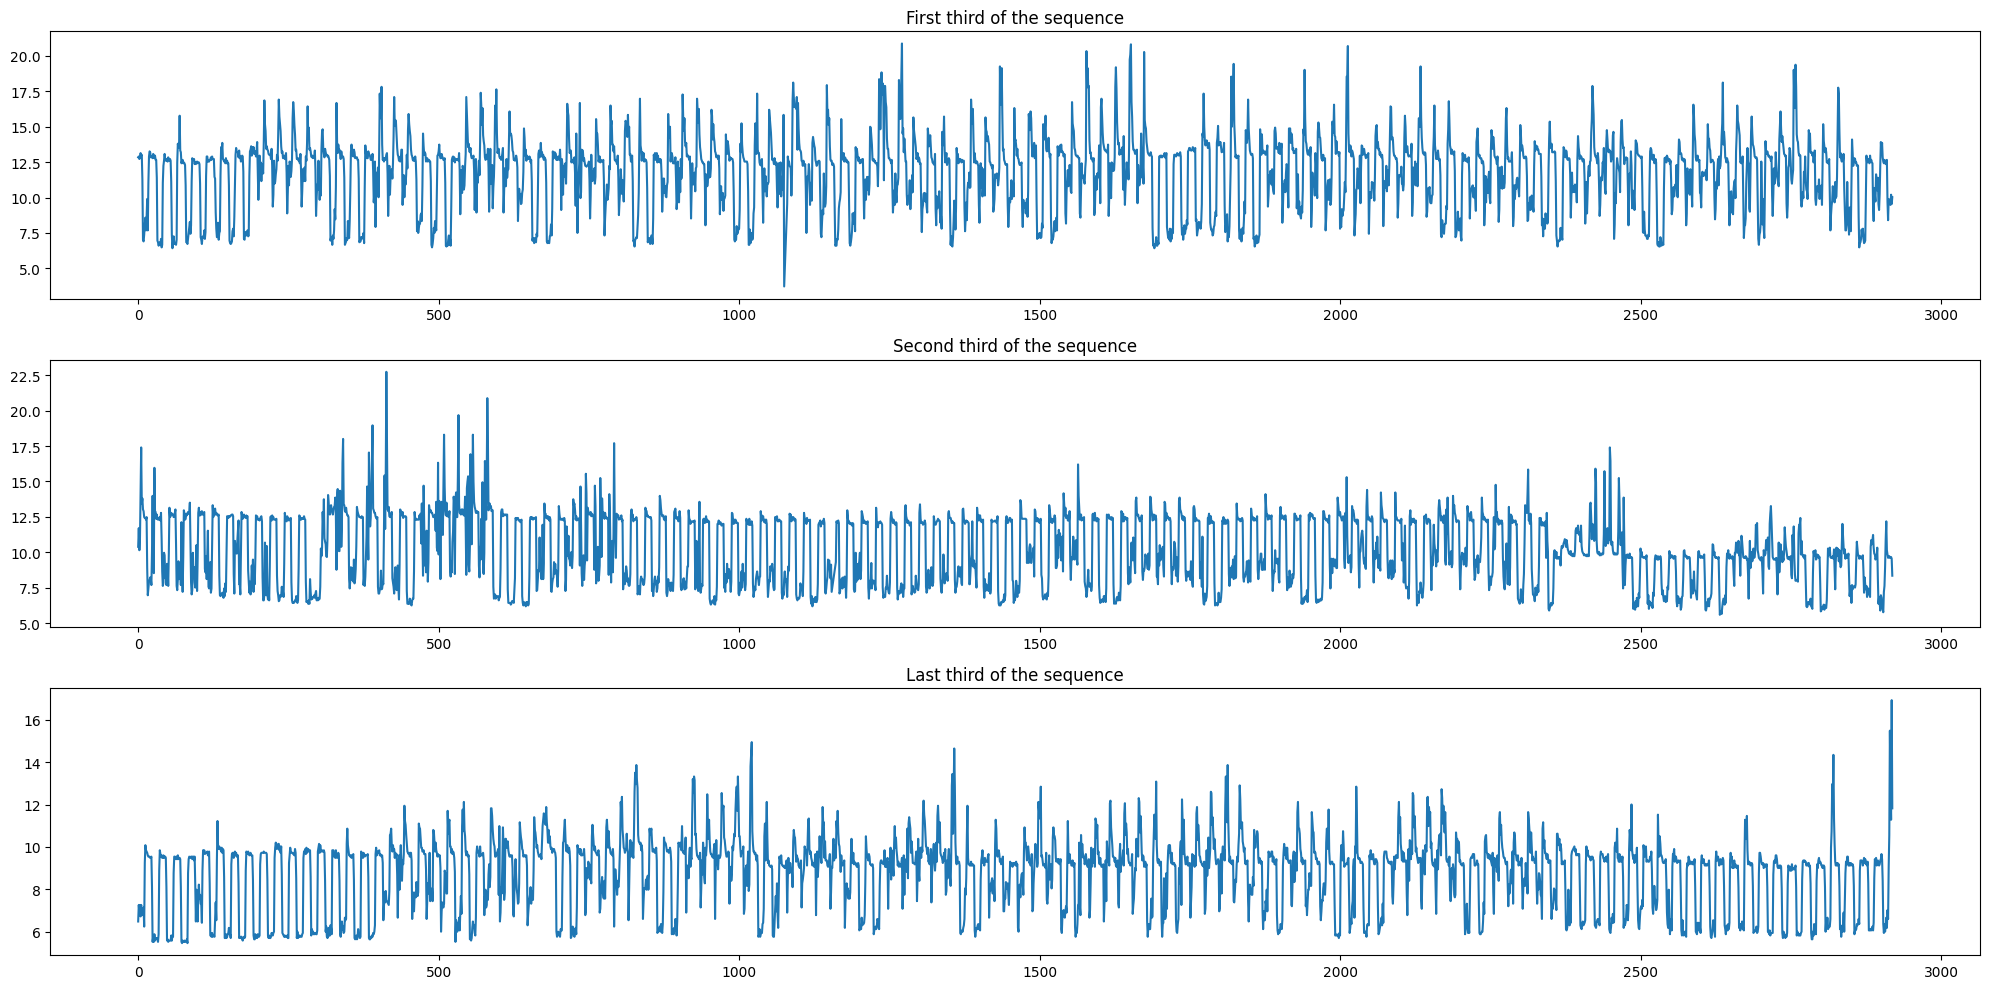

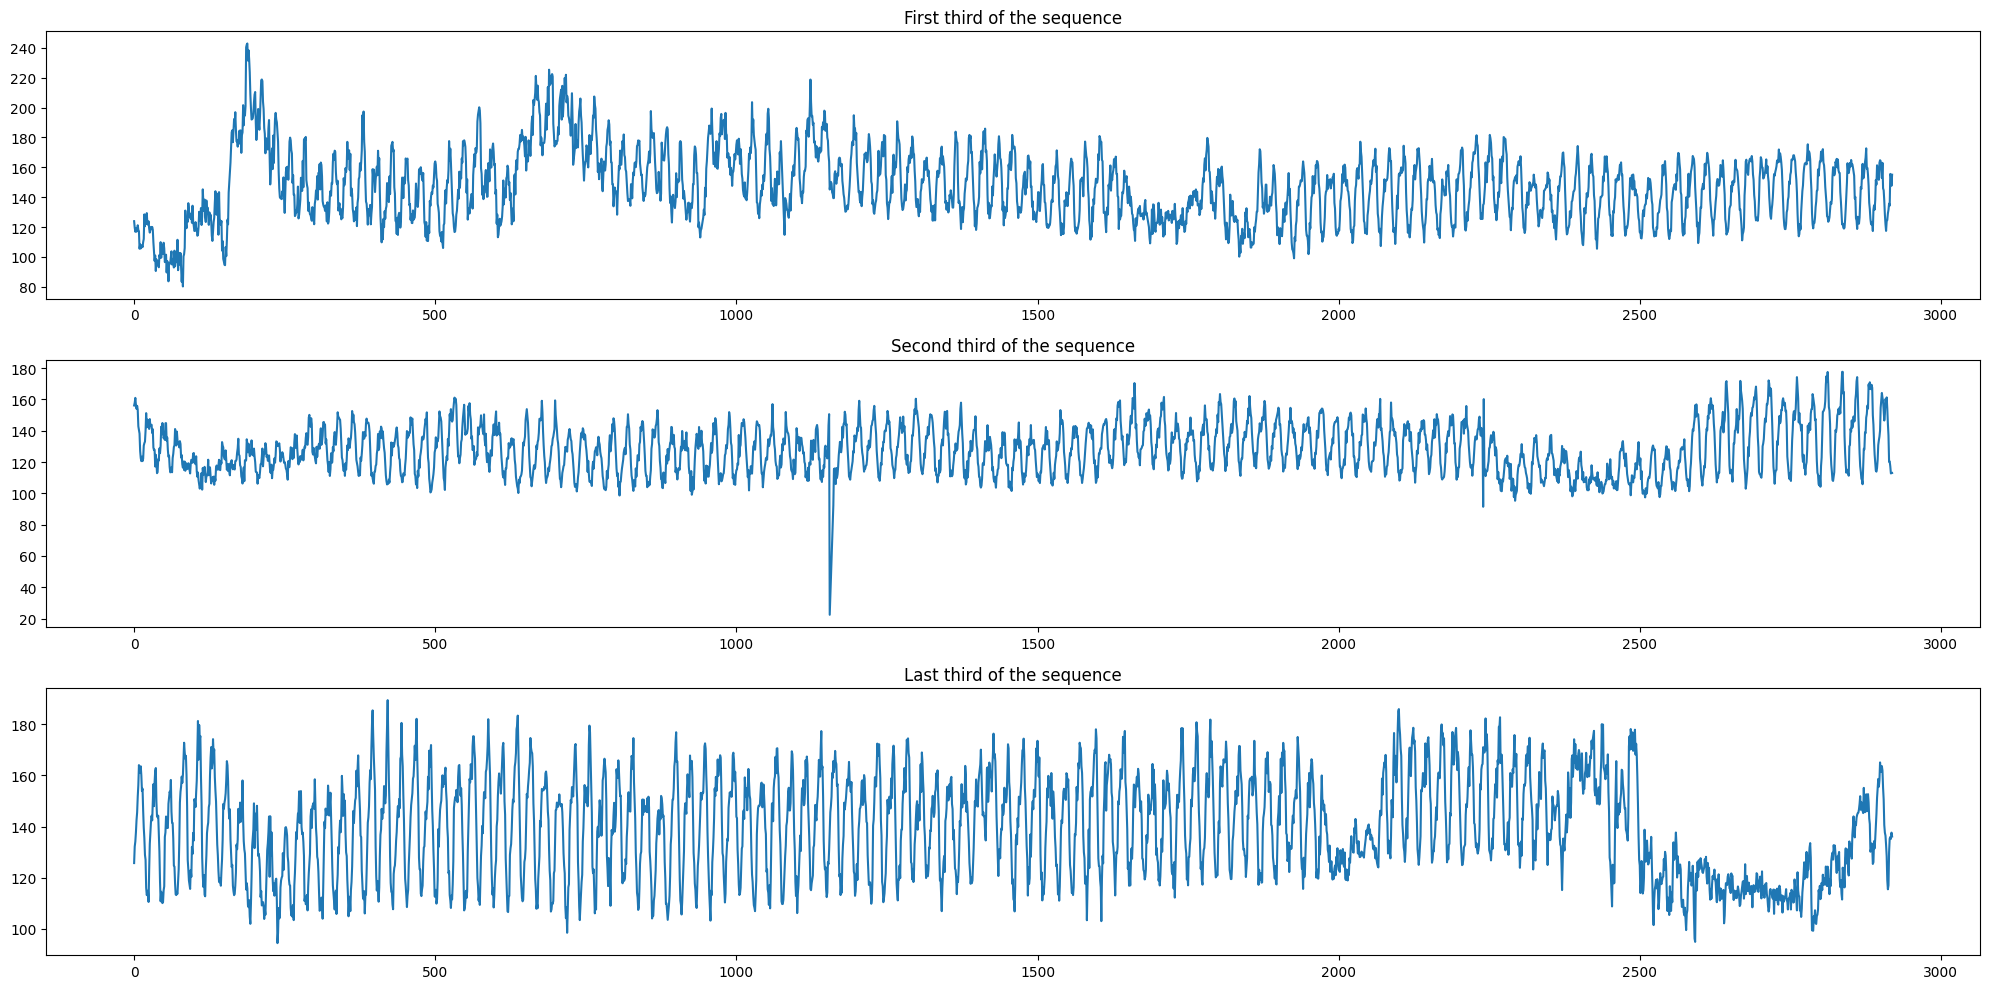

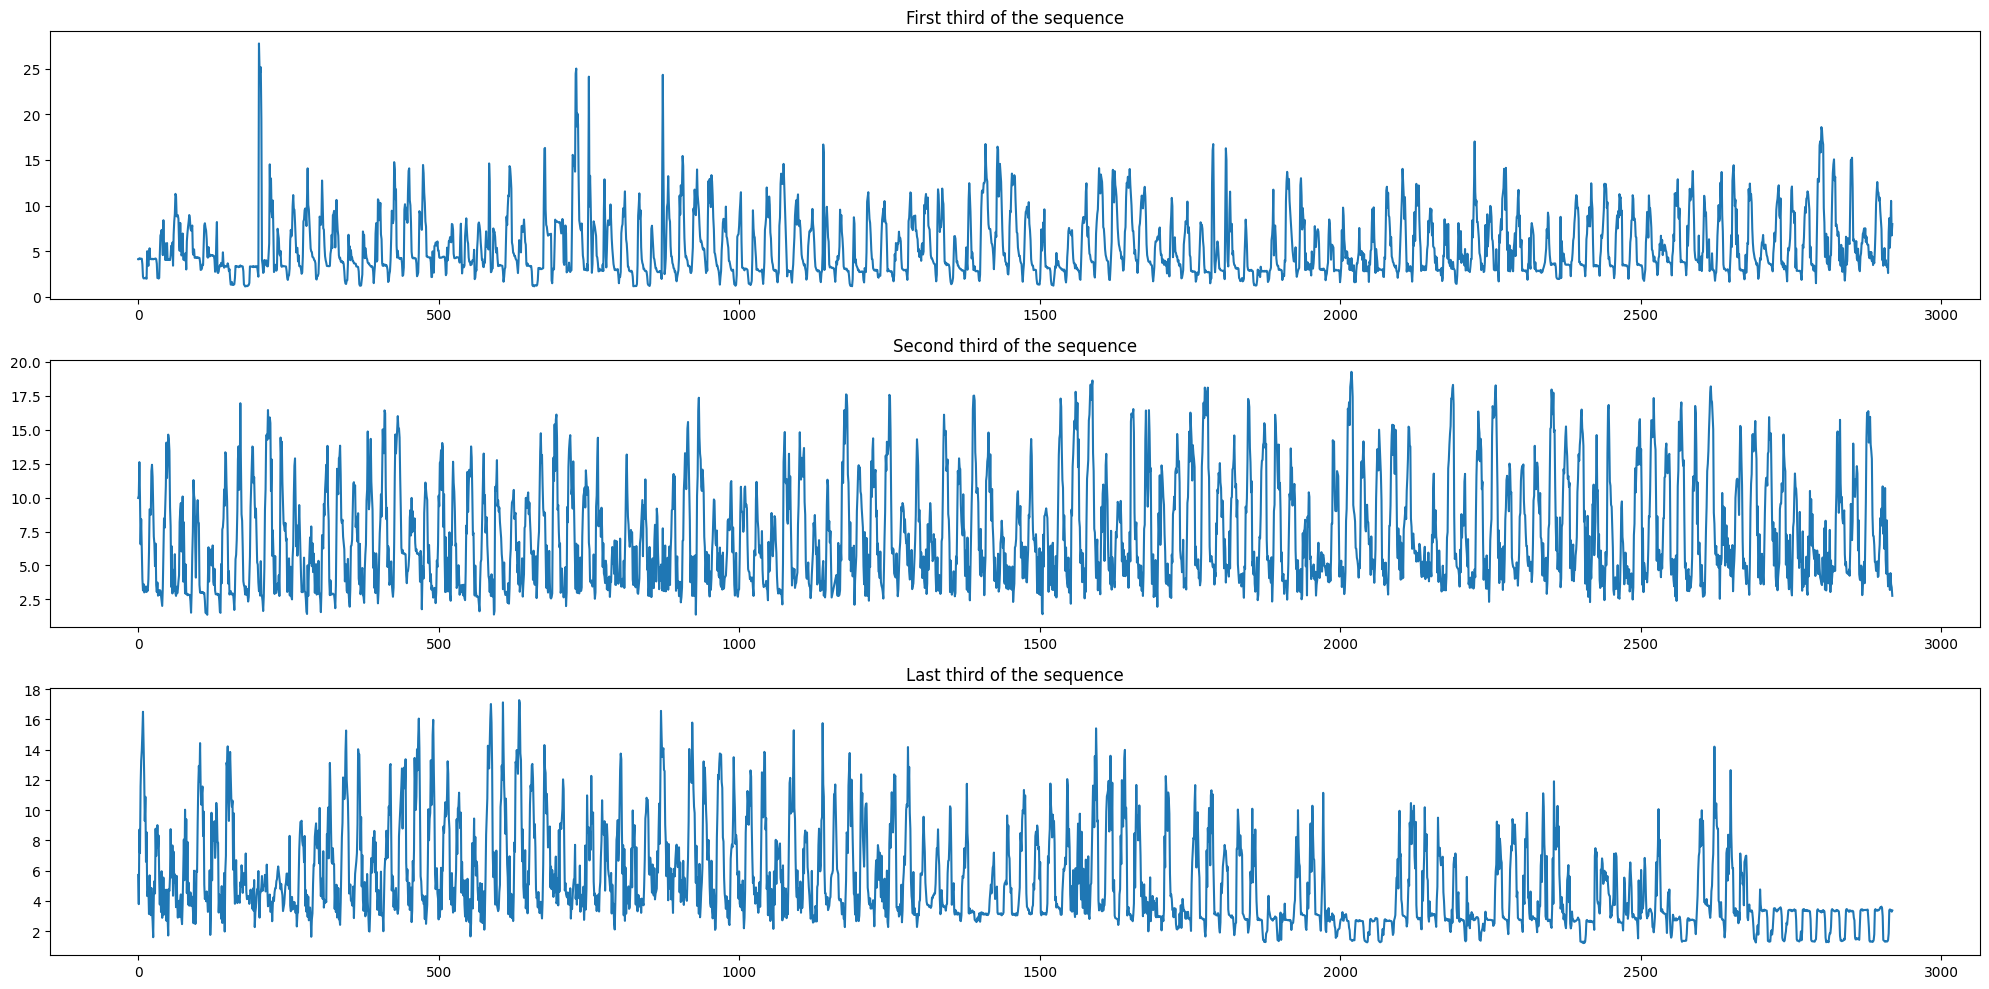

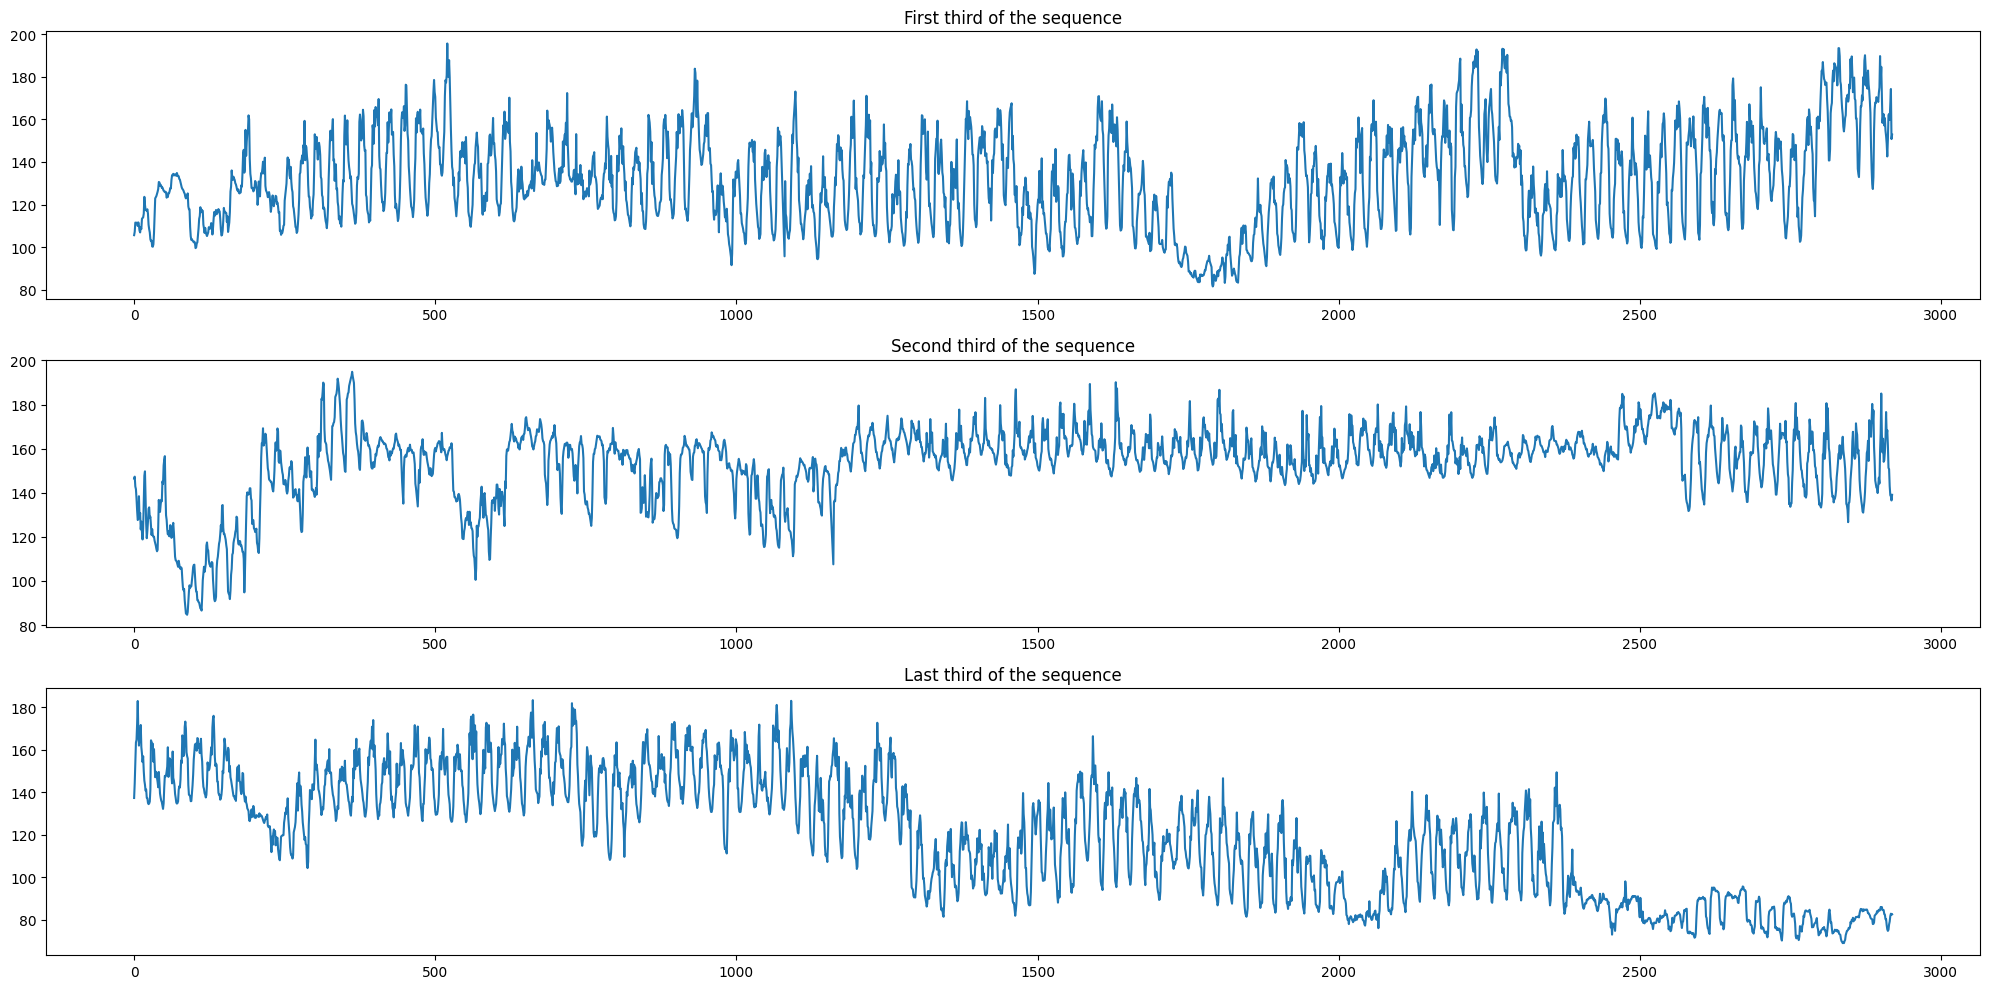

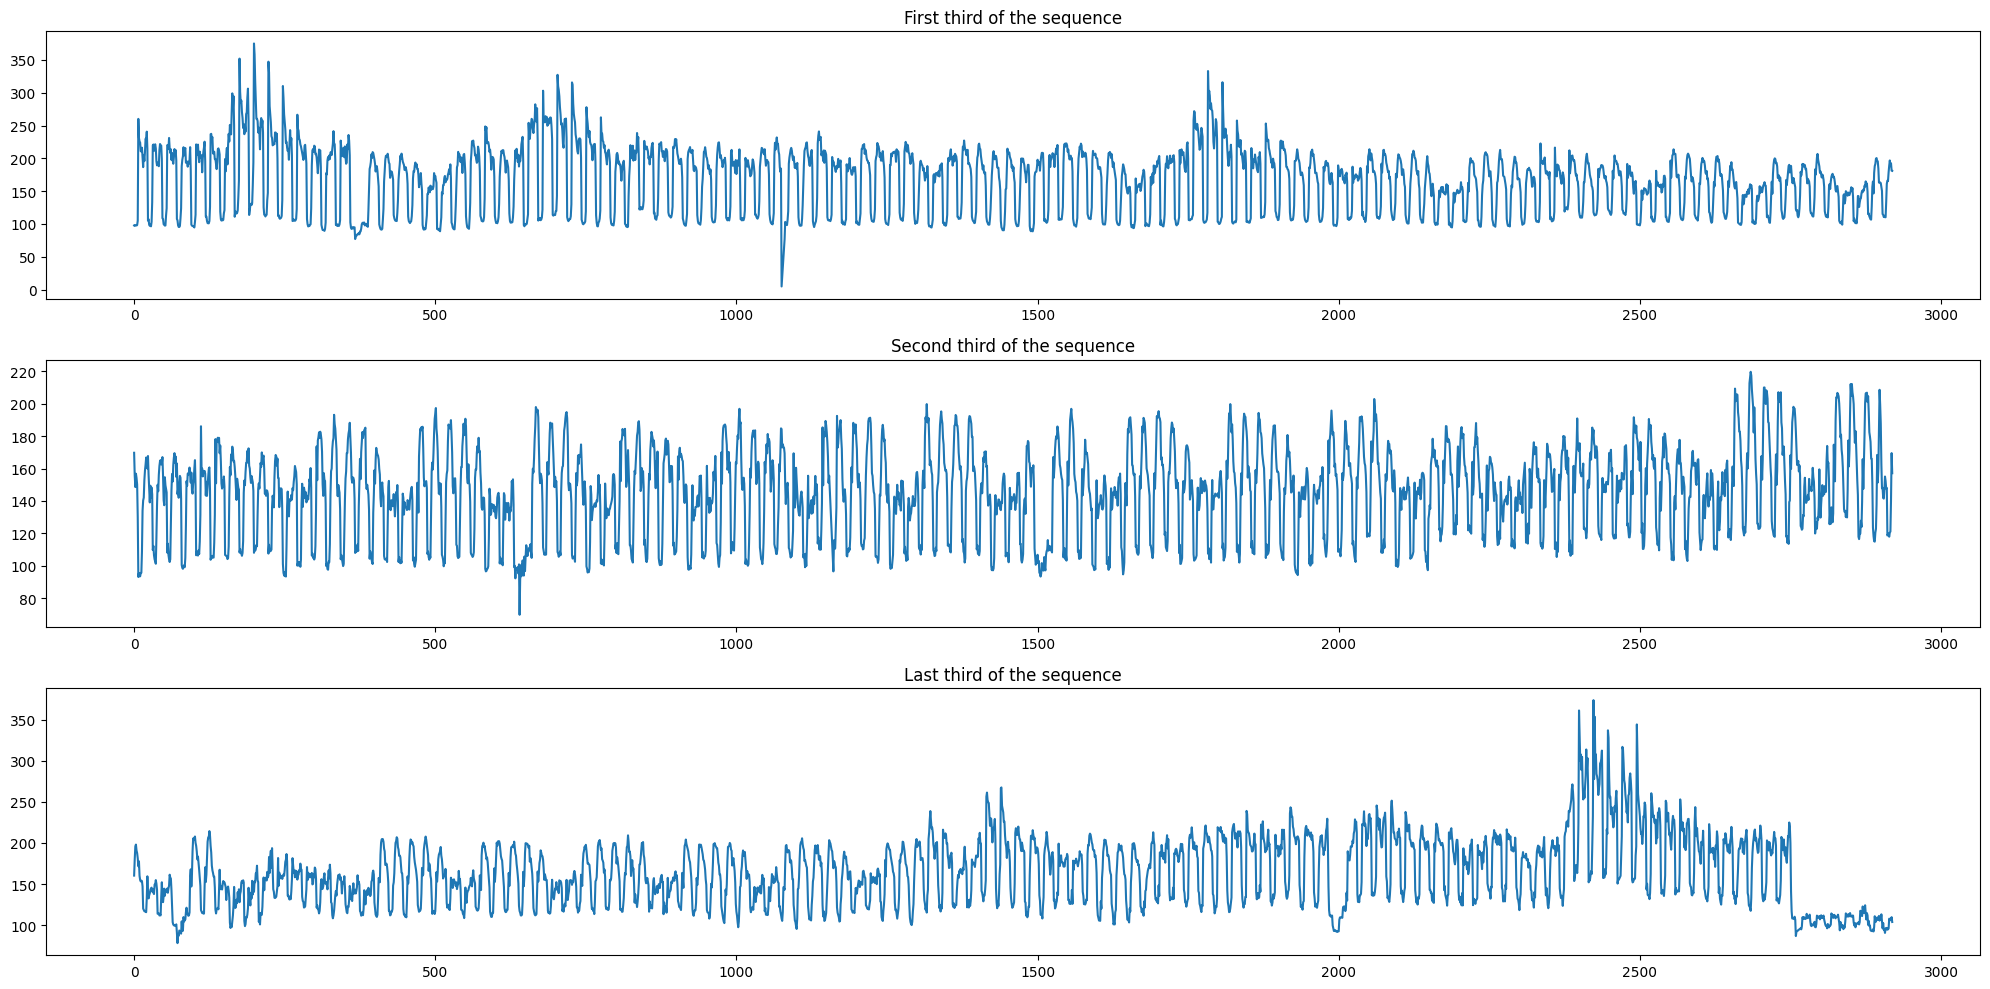

In [49]:
for i in range(5):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

    # 获取序列
    sequence = dataset[i]['target']
    length = len(sequence)
    third = length // 3

    # 在每个子图中展示序列的不同部分
    axes[0].plot(sequence[:third])
    axes[0].set_title('First third of the sequence')

    axes[1].plot(sequence[third:2*third])
    axes[1].set_title('Second third of the sequence')

    axes[2].plot(sequence[2*third:])
    axes[2].set_title('Last third of the sequence')

    plt.tight_layout()
    plt.show()